# <center> Statistical Arbitrage with Vine Copulas - Pair Selection </center>

Author: Jui Lin(Jamie) Keng <br>
Email: jamiekeng1016@gmail.com <br>
LinkedIn : https://www.linkedin.com/in/jui-lin-jamie-keng-3883b6131/

# Introduction

This notebook demonstrates four different approaches to the pair selection methods described in section three in [1]. The goal is to select three of the most suitable partner stocks given a target stock to form a quadruple. Based on different measures of dependence, each approach yields similar results, surprisingly. <br>

Please note that it is computationally expensive to find $\binom{50}{3}$ potential partner-stock combinations for every single constituent in S&P500. Therefore, I designed functions in a way that users can choose the number of target stocks out of S&P500, and the number of potential partner-stock combinations for each target stocks. <br>

In the following demonstration, the file test_sp500.csv only contains 89 randomly picked constituents from S&P500. I chose to find $\binom{10}{3}$ potential partner-stock combinations for each target stock to accelerate computation.




# Structure of the notebook body
1. Import and dowload the S&P500 historical price data <br>
2. Partner Selection <br>
    2.0. Basic Processing <br>
    2.1. Traditional Approach <br>
    2.2. Extended Approach <br>
    2.3. Geometric Approaach <br>
    2.4. Extremal Approach <br>
3. Visualization <br>
    3.1 Simple Scatter Plot Matrix <br>
    3.2 Frequency <br>
    3.3 PCA Analysis <br>
4. Analysis and Discussion <br>
5. Conclusion <br>

<img src='framework.jpeg' width="700" height="600">


-----

# 1. Import and dowload the S&P500 historical price data

In [1]:
import pandas as pd
import numpy as np

from preliminary import preliminary
from basic_processing import basic_processing
from approach_choice import approach_choice
from visualization import visualization
pre = preliminary()
basic = basic_processing()


Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [4]:
# Download the historical S&P 500 price data
start_date = "2015-01-01"
end_date =  "2021-02-01"
interval = "1d"  
num = 100

hist_data = pre.download_sp500(start_date, end_date, interval, num)

# Neglect the last row of the dataset
hist_data = hist_data[:-1]
hist_data = pre.remove_nuns(hist_data)

# Save the downloaded historical price dataset to a designated directory.
path ='./'
hist_data.to_csv(path + 'sp500.csv')


[*********************100%***********************]  91 of 91 completed

1 Failed download:
- WRK: No data found for this date range, symbol may be delisted


----

# 2. Partner Selection

## 2.0 Basic Processing

In [2]:
# Read the testing dataset
sp500 = pd.read_csv('./test_sp500.csv', index_col =0)

# Calcualte returns of each stock.
ret_sp500 = pre.get_returns_data(sp500)

In [3]:
# Stock Index Correspondance(for visualization)
stock_ind_dict = pre.stock_index(ret_sp500)

In [4]:
# Get spearman's rho matrix as well as the potential partner stocks for each stock in the dataset.
df_corr, partner_dict = basic.partner_selection(ret_df= ret_sp500, partner_num= 10)

In [5]:
# Get the quadruple cadidates for each stock in the dataset.
final_pair_dict = basic.potential_quadruples(partner_dict)

-----

## 2.1. Traditional Approach

In [6]:
approach = approach_choice(return_df = ret_sp500)

In [7]:
# Get the sum of spearman's rho for every quadruple.
quadruple_dict_trad = approach.traditional(final_pair_dict, df_corr)

In [8]:
# Get the final quadruple for every target stock.
result_trad = approach.final_quadruple(quadruple_dict_trad, approach = "traditional")


-------

## 2.2 Extended Approach

In [13]:
approach = approach_choice(return_df = ret_sp500)

In [14]:
# Get the multivariate spearman's rho for every quadruple.
quadruple_dict_extended = approach.extended(final_pair_dict, df_corr)

In [15]:
# Get the final quadruple for every target stock.
result_extended = approach.final_quadruple(quadruple_dict_extended, approach = "extended")

-----

## 2.3 Geometric Approach

In [19]:
approach = approach_choice(return_df = ret_sp500)

In [20]:
# Get the sum of euclidean distance for every quadruple.
quadruple_dict_geometric = approach.geometric(final_pair_dict, df_corr)

In [21]:
# Get the final quadruple for every target stock.
result_geometric = approach.final_quadruple(quadruple_dict_geometric, approach = "geometric")

-----

## 2.4 Extremal Approach

In [25]:
approach = approach_choice(return_df = ret_sp500)

In [26]:
# Get the value of chi square test statistic for every quadruple.
quadruple_dict_extremal = approach.extremal(final_pair_dict, df_corr)

In [27]:
# Get the final quadruple for every target stock.
result_extremal = approach.final_quadruple(quadruple_dict_extremal, approach = "extremal")

----

# 3. Visualization

In [9]:
plot = visualization(return_df = ret_sp500)

## 3.1. Simple Scatter Plot Matrix (for a  quadruple)

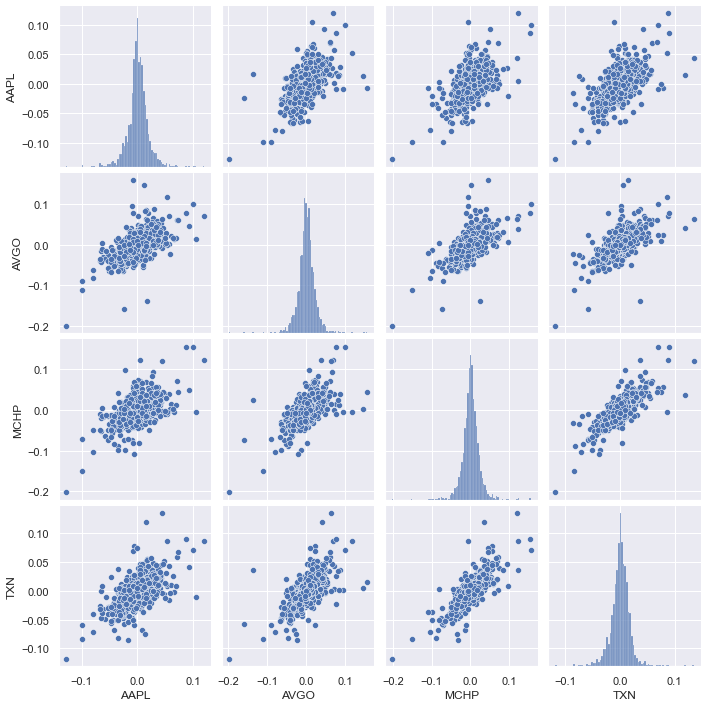

In [28]:
plot.scatterplot_matrix(approach_result= result_extremal, target_stock_index= 1)


## 3.2 Frequency

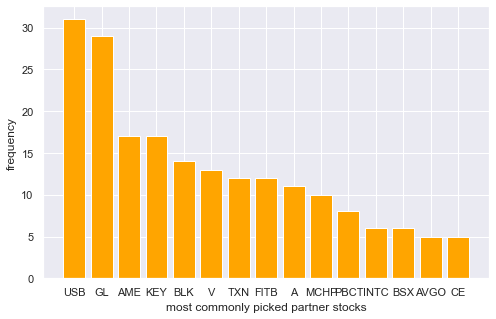

In [29]:
# Frequency of a number of top most commonly picked partner stocks in final quadruples.
plot.Freq_partner_stocks(approach_result= result_extremal, stock_ind_dict = stock_ind_dict, num =15)


## 3.3 PCA Analysis

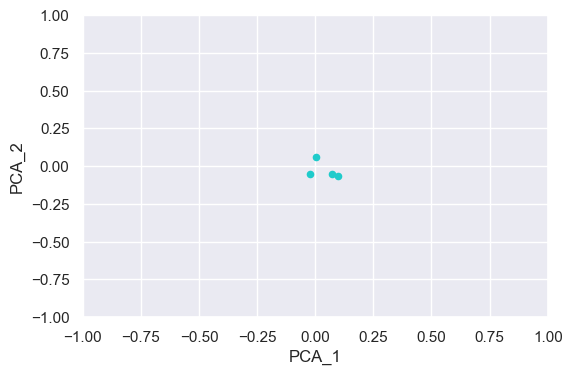

In [30]:
# Comparision of the first and second most important components of stocks in a quadruple.
plot.PCA_plot(approach_result = result_extremal, target_stock_index= 4, choice="single")



-----

# 4. Analysis and Discussion

From the 3.1 simple scatter plot matrix, users get to check the return distributions of target stocks and three partner stocks in a quadruple. Though the goal here is to find multivariate correlations among four stocks, users can observe from the plot that points tend to be around the diagonal line. Points deviated far from the diagonal line signal potential arbitrage opportunity. <br>

I added a histogram to count the frequency of stocks being partner stocks in the final quadruples under a partner-selection approach. Though it is unclear what common characteristics these "top-partner" stocks share, I intend to find out. This can be a good research topic!<br>

In the 3.3 PCA Analysis section, users are able to compare the first and second most important components of stocks in a quadruple. The first and second primary components of stocks in a final quadruple are supposed to be close to one another. Maybe calculating the sum of the distance between primary components of stocks in potential quadruples could be another approach to finding the most suitable quadruple.


Further analysis could be expanded beyond the S&P500 index to other financial assets.




----

# 5. Conclusion

Surprisingly, given a target stock, the final quadruples selected by four different approaches are almost the same. <br> (Check out variables, result_trad, result_extended, result_geometric, result_approach )

This indicates that the final quadruple selected for each target stock are mathematically reliable. 

----

# Reference

[1] Statistical arbitrage with vine copulas, FAU Discussion Papers in Economics, No. 11/2016, Friedrich-Alexander-Universität Erlangen-Nürnberg, Institute for Economics, Nürnberg <br> 
[2] A multivariate rank test of independence based on a multiparametric polynomial copula, IWQW Discussion Papers, No. 10/2015, Friedrich- Alexander-Universität Erlangen-Nürnberg, Institut für Wirtschaftspolitik und Quantitative Wirtschaftsforschung (IWQW), Nürnberg <br>
[3] Justin Bedo, Cheng Soon Ong, Multivariate Spearman’s ρ for Aggregating Ranks Using Copulas (2016) <br>
[4] Mark S. Tenney, Introduction to Copulas (2003) <br>
[5] Roger B. Nelsem, Properties and applications of copulas: A brief survey <br>